### Student Information
Name: 蘇昱丞

Student ID: 111033637

GitHub ID: Su033637

Kaggle name: su111033637

Kaggle private scoreboard snapshot: [Snapshot](img/pic0.png)



---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

---

# First Part

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
total = [test_df, train_df]
total_df = pd.concat(total)
print(total_df.shape, test_df.shape, train_df.shape)

(3960, 4) (347, 4) (3613, 4)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect_test = CountVectorizer()
total_vect = CountVectorizer()
test_count = count_vect_test.fit_transform(test_df.text)
train_count = count_vect.fit_transform(train_df.text)
total_count = total_vect.fit_transform(total_df.text)


In [ ]:
test_count_df = pd.DataFrame(test_count.toarray())
sum_test_count = test_count_df.sum()
test_count_df = test_count_df[sum_test_count.sort_values(ascending=False).index[:]]
test_index = list(test_count_df.columns)

In [ ]:
train_count_df = pd.DataFrame(train_count.toarray())
sum_train_count = train_count_df.sum()
train_count_df = train_count_df[sum_train_count.sort_values(ascending=False).index[:]]
train_index = list(train_count_df.columns)

In [ ]:
total_count_df = pd.DataFrame(total_count.toarray())
sum_total_count = total_count_df.sum()
total_count_df = total_count_df[sum_total_count.sort_values(ascending=False).index[:]]
total_index = list(total_count_df.columns)

In [ ]:
import plotly.express as px

train_tf = sum_train_count.tolist()

p_x = count_vect.get_feature_names_out()[train_index[0:30]]
p_y = [train_tf[i] for i in train_index[0:30]]

fig = px.bar(x=p_x, y=p_y, category_orders=p_x, 
            labels={'x':'Feature names', 'y':'Frequencies'}, 
            title="Top 30 most frequently appearing features")
fig.show()

In [ ]:
import plotly.express as px

test_tf = sum_test_count.tolist()

p_x = count_vect_test.get_feature_names_out()[test_index[0:30]]
p_y = [test_tf[i] for i in test_index[0:30]]

fig = px.bar(x=p_x, y=p_y, category_orders=p_x, 
            labels={'x':'Feature names', 'y':'Frequencies'}, 
            title="Top 30 most frequently appearing features")
fig.show()

In [ ]:
import plotly.express as px

total_tf = sum_total_count.tolist()

p_x = total_vect.get_feature_names_out()[total_index[0:30]]
p_y = [total_tf[i] for i in total_index[0:30]]

fig = px.bar(x=p_x, y=p_y, category_orders=p_x, 
            labels={'x':'Feature names', 'y':'Frequencies'}, 
            title="Top 30 most frequently appearing features")
fig.show()

---
### 1.2 Save data

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

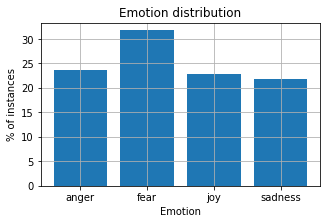

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\CI Lab\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 5, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 4, 1, ..., 0, 0, 0]], dtype=int64)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer(max_features=1000)
ft_TFIDF = TFIDF.fit_transform(train_df['text'])
TFIDF_DF = pd.DataFrame(ft_TFIDF.toarray(), columns= TFIDF.get_feature_names_out())
print(TFIDF.get_feature_names_out()[100:110])

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'fear', 'fear', 'anger', 'sadness', 'joy',
       'anger', 'fear', 'sadness'], dtype=object)

---
## 4. Results Evaluation

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

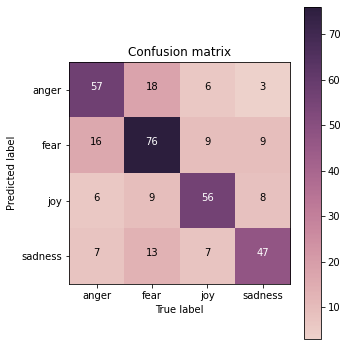

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
# Below

The diagonal of the confusion matrix is the right prediction. As the confusion shown above, the correct prediction is abviously pretty high ammong the incorrect ones. Although others represents the incorrect prediction, we can still get some usefull information, such as "anger" and "fear" seems to be pretty confuse for the predictor.

Since the ammount of each emotion is different, I suppose the heat color of the confusion matrix is kind of unfair. For instance, the 2-2 of the matrix is 76, but "fear" isn't the most accurate prediction among others. Therefore, view the result above the matrix we can get the accurate ratio of each , which is 0.66, 0.66, 0.72, and 0.7. From the information above, "joy" has the the accurate prediction. I suppose it is caused by joy emotion is very distinct by a positive depression, while others are kind of negative depressions.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

pred_train = MNB.predict(X_train)
pred_test = MNB.predict(X_test)

print('training acc = {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=pred_train)*100))
print('testing acc = {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=pred_test)*100))
print(classification_report(y_true=y_test, y_pred=pred_test))

training acc = 79.19 %
testing acc = 69.74 %
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


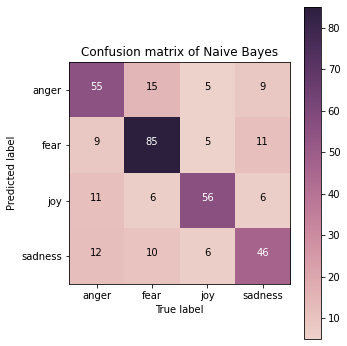

In [ ]:
plot_naive = confusion_matrix(y_true=y_test, y_pred=pred_test)
print(plot_naive)
plot_confusion_matrix(plot_naive, classes=my_tags, title='Confusion matrix of Naive Bayes')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

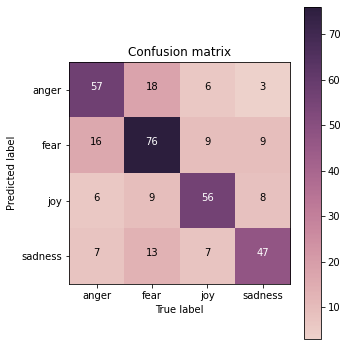

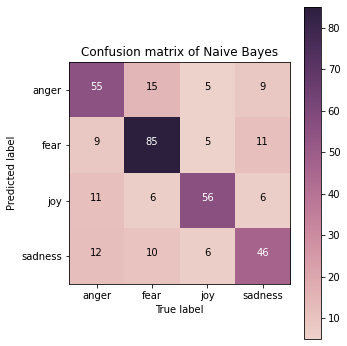

In [ ]:
# Answer here
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
plot_confusion_matrix(plot_naive, classes=my_tags, title='Confusion matrix of Naive Bayes')

#### Naive Bayes
Naive Bayes is a model based on Bayes theorem. It calaulates probability when X occur at given C. In Naive Bayes we make an assumption that attributes are independent, while in this case is totally fine.
#### Decision tree
Decision tree checks every feature, and output a decision tree with it's end node is different classifications. It has a hard time with correlated attributes, and is fine in this case.
#### Comparison
In this case, both Naive Bayes and decision tree has a pretty good presiction rate. As the confusion matrix plot above, Naive Bayes is a seldom better at the predict rate, specially classifing "joy". I suppose it is caused by the advantage Naive Bayes has in independent attrubutes (here as number of words), and decision tree might be overfitting without pruning.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [ ]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1125    fear
1406    fear
2521     joy
1158    fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\Users\CI Lab\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 1s 3ms/step - loss: 1.3311 - accuracy: 0.3653 - val_loss: 1.2677 - val_accuracy: 0.4697
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0030 - accuracy: 0.6313 - val_loss: 0.9271 - val_accuracy: 0.6859
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7924 - val_loss: 0.7977 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8439 - val_loss: 0.8142 - val_accuracy: 0.6715
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8840 - val_loss: 0.8121 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.9084 - val_loss: 0.8901 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9319 - val_loss: 0.9656 - val_accuracy: 0.6830
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 1ms/step


array([[1.7092350e-01, 8.2863897e-01, 6.3155206e-08, 4.3746919e-04],
       [1.4242363e-05, 9.9998438e-01, 8.8700119e-07, 4.6176157e-07],
       [9.5890397e-01, 1.0056748e-02, 1.9103682e-06, 3.1037282e-02],
       [1.4591627e-07, 5.1053456e-05, 9.9993670e-01, 1.2085113e-05],
       [3.9952029e-05, 4.5472533e-03, 2.7146585e-02, 9.6826631e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'anger', 'joy', 'sadness'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.366454,1.324174,0.466859,1.270507
1,1,0.652920,0.971192,0.642651,0.959898
2,2,0.786881,0.591883,0.688761,0.841572
3,3,0.843067,0.422533,0.711816,0.822705
4,4,0.879325,0.334169,0.682997,0.850887
5,5,0.904235,0.273236,0.677233,0.921801
6,6,0.920288,0.237511,0.665706,0.970396
7,7,0.936618,0.193188,0.682997,0.997871
8,8,0.949903,0.163084,0.662824,1.058802
9,9,0.958483,0.138635,0.654179,1.110663


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [ ]:
# Answer here
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Training Accuracy per epoch', fontsize=10)
x = np.arange(1, len(training_log.accuracy)+1, 1)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(x, training_log.accuracy, color='b', label='Train accuracy',linewidth=1.5)
plt.plot(x, training_log.val_accuracy,  color='r', label='Val accuracy', linewidth=1.5)
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.legend()
plt.show()

# Plot the training and validation loss
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Training Loss per epoch', fontsize=10)
x = np.arange(1, len(training_log.loss)+1, 1)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(x, training_log.loss, color='b', label='Train loss',linewidth=1.5)
plt.plot(x, training_log.val_loss,  color='r', label='Val loss', linewidth=1.5)
plt.ylabel('Loss', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.legend()
plt.show()

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3468,40641,@WriterlyTweets Supine on the piano—lips parte...,"[@, WriterlyTweets, Supine, on, the, piano—lip..."
3277,40450,When you're on a train as its pitch black outs...,"[When, you, 're, on, a, train, as, its, pitch,..."
871,20014,Job interview in the afternoon #nervous #ek,"[Job, interview, in, the, afternoon, #, nervou..."
2613,30609,"@MerenthaProphet - the Hunter in this way, con...","[@, MerenthaProphet, -, the, Hunter, in, this,..."
1849,20992,@darwinwatersons @pennyfitzger31 @gumballwatte...,"[@, darwinwatersons, @, pennyfitzger31, @, gum..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'WriterlyTweets', 'Supine', 'on', 'the', 'piano—lips', 'parted', '.', '#', 'sixwordstory', '#', 'amwriting', '#', 'blues', '#', 'singer']),
       list(['When', 'you', "'re", 'on', 'a', 'train', 'as', 'its', 'pitch', 'black', 'outside', 'and', 'you', 'have', 'no', 'idea', 'where', 'you', 'are', '...', '#', 'travel', '#', 'whereami', '#', 'lost', '#', 'adventure']),
       list(['Job', 'interview', 'in', 'the', 'afternoon', '#', 'nervous', '#', 'ek'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.35168323, -0.03251585, -0.184815  ,  0.1953115 , -0.09543969,
       -1.3388827 ,  0.28183717,  1.5637618 , -0.3859233 , -0.3661406 ,
       -0.19030347, -0.7201935 , -0.01069294,  0.04829036, -0.2375593 ,
       -0.19946319,  0.6248283 , -0.2775689 ,  0.8071933 , -0.93050605,
        0.43793   ,  1.0004755 ,  0.6878124 , -0.12424821,  0.01406439,
       -0.13067023, -0.1686663 ,  0.70082295, -0.33801728, -0.16233896,
        0.520519  , -0.07932585,  0.7662988 , -0.37601858, -0.3392255 ,
        0.16033804,  0.2903758 , -0.27014247, -0.21550845, -0.34130678,
       -0.09691266,  0.13072892, -0.28421524,  0.15450266,  0.69193095,
       -0.46633035, -0.46123528, -0.20757353,  0.25917548,  0.28896362,
        0.1350905 , -0.49871948, -0.35011265,  0.05934009, -0.5334071 ,
       -0.6424493 ,  0.00367554, -0.5925786 , -0.37899902,  0.16335164,
        0.05804515,  0.18857172,  0.3277074 ,  0.04466628, -0.62545854,
        0.9428438 , -0.02430423,  0.4613582 , -1.4567856 ,  0.46

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[("'you", 0.919280469417572),
 ('Be', 0.9175164103507996),
 ('cant', 0.9127349257469177),
 ('bday', 0.911691427230835),
 ('dad', 0.9099951386451721),
 ('Kik', 0.9091761112213135),
 ('cats', 0.9023267030715942),
 ('blessed', 0.9015131592750549),
 ('smile', 0.8988259434700012),
 ('.\\nA', 0.8963103890419006)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/Users/CI Lab/Desktop/HW/Data Mining/Lab1/DM2022-Lab1-Master-main/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
# Answer below


Word2Vec turns word to vector, but feature we wanted is based on the whole sentence. According to that, several thoughts are given.<br>
1. Average the vectors in the sentence to get feature in sentence.
2. Use Doc2Vec, which is an extension of Word2Vec, instead.
3. Use similar vec to represent similarity between words to feature the data.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

### 9.1 Prepare visualizing target

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

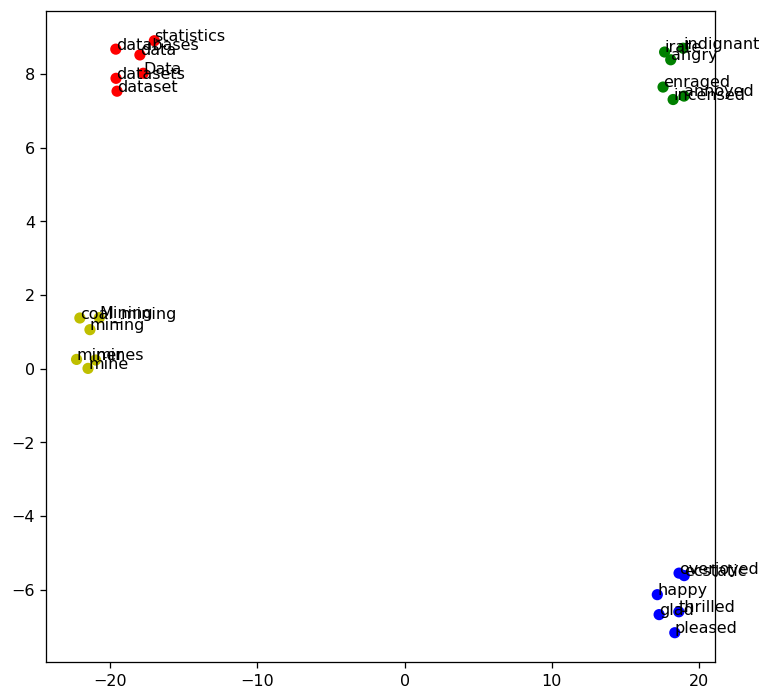

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28,square_distances = True)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---


## 1. Data Preparation
### 1.1 Load data
Read csv file

In [1]:
import pandas as pd
import json
DATA_FOLDER = 'data/'
data_identification = pd.read_csv(DATA_FOLDER+"data_identification.csv")
emotion = pd.read_csv(DATA_FOLDER+"emotion.csv")



Read .json 

In [2]:
tweet_lst = []
with open(DATA_FOLDER+'tweets_DM.json') as tweet_file:
        for line in tweet_file:
            tweet_lst.append(json.loads(line))

Tweet id + text => dataframe

In [3]:
t_id=[]
t_text =[]
for t in tweet_lst:
    t_id.append(t["_source"]["tweet"]["tweet_id"])
    t_text.append(t["_source"]["tweet"]["text"])
tweet_data = pd.DataFrame({'tweet_id':t_id, 'text':t_text})


Test => predict
<br>Train => data

In [4]:
test_id = data_identification[data_identification['identification']=='test']
train_id = data_identification[data_identification['identification']=='train']
train_id = train_id.drop(['identification'], axis=1)
test_id = test_id.drop(['identification'], axis=1)

data_Y = pd.merge(train_id, emotion)
data_X = pd.merge(data_Y, tweet_data)
data = pd.merge(data_X, data_Y)
predict = pd.merge(test_id, tweet_data)

Delete punctuation and numbers in data from Train & Test dataframe.

In [5]:
import string
for i, row in data.iterrows():
    data.at[i,'text'] = data.at[i, 'text'].translate(str.maketrans('', '', string.punctuation))
    data.at[i,'text'] = data.at[i, 'text'].translate(str.maketrans(string.ascii_letters, string.ascii_letters, string.digits))


In [6]:
import string
for i, row in predict.iterrows():
    predict.at[i,'text'] = predict.at[i, 'text'].translate(str.maketrans('', '', string.punctuation))
    predict.at[i,'text'] = predict.at[i, 'text'].translate(str.maketrans(string.ascii_letters, string.ascii_letters, string.digits))


Shuffle dataset

In [7]:

data = data.sample(frac=1)
predict = predict.sample(frac=1)

Visualize ammount in every class by bar plot

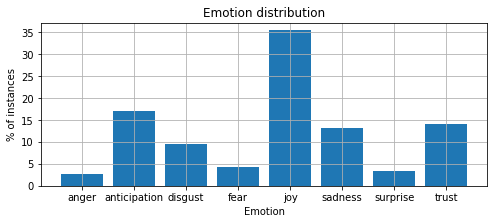

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = data['emotion'].unique()
post_total = len(data)
df1 = data.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(data['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(data['text'])
test_data_BOW_features = BOW_vectorizer.transform(predict['text'])

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(data['text'])

train_data_BOW_features_500 = BOW_500.transform(data['text'])

## check dimension
train_data_BOW_features_500.shape

### Using TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer(max_features=1000)
ft_TFIDF = TFIDF.fit_transform(data['text'])
TFIDF_DF = pd.DataFrame(ft_TFIDF.toarray(), columns= TFIDF.get_feature_names_out())
print(TFIDF.get_feature_names_out()[100:110])

Arrange stop words

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
sw = ['!','@','#','$','%','^','&','*','(',')','_',',','.','/','00', '00am', '00pm', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '100', '11', '12', '13', '14', '15', '15am',
       '15pm', '16', '17', '18', '19', '1st', '20', '2017', '2018', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '2nd', '30',
       '30am', '30pm', '31', '32', '37', '38', '39', '40', '41', '45',
       '45am', '45pm', '50', '69', '70', '71', '72', '73', '75', '76', "'", '+',
       '-', '..', '...', '1', '1.0', '1.4', '1/2', '13:13', '2', '2.3',
       '3', '4', '5', '6', '7', '8', '9', ':', ':(', ':)', ';', '<3', '=','"',
       '>', '?','i','me', 'my', 'myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your',
       'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
       'herself','it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which','who', 'whom', 'this', 'that', "that'll",
       'these', 'those', 'am', 'is', 'are', 'was', 'were','be', 'been', 'being', 'have', 'has', 'had', 'having',
       'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
       'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into','through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
       'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
       'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
       'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same','b','c',
       'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll',
       'm', 'o', 're', 've', 'y', 'ain', 'aren',"aren't",'couldn', "couldn't", 'didn', "didn't", 'doesn',
       "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
       "mightn't", 'mustn', "mustn't",'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
       'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

[nltk_data] Downloading package stopwords to C:\Users\CI
[nltk_data]     Lab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Use max_features=1000, min_df=5, max_df=0.5, stop_words=sw, tokenizer=tok in TFIDF

In [9]:
# Answer here
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords


def tok(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

sw_nltk = stopwords.words('english')

TFIDF = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.5, stop_words=sw, tokenizer=tok)
ft_TFIDF = TFIDF.fit_transform(data['text'])


In [11]:
TFIDF.get_feature_names_out()[0:100]

array(['able', 'absolutely', 'accept', 'account', 'act', 'action',
       'actually', 'add', 'af', 'afraid', 'ago', 'agree', 'ahead', 'aint',
       'air', 'album', 'alive', 'allah', 'almost', 'alone', 'already',
       'also', 'always', 'amazing', 'amen', 'america', 'american',
       'americans', 'another', 'answer', 'anymore', 'anyone', 'anything',
       'app', 'apple', 'appreciate', 'arent', 'around', 'ask', 'asked',
       'asking', 'ass', 'attention', 'august', 'away', 'awesome', 'baby',
       'back', 'bad', 'baffles', 'bb', 'bc', 'beat', 'beautiful',
       'beauty', 'beckons', 'become', 'bed', 'begin', 'behind', 'believe',
       'best', 'better', 'beyond', 'big', 'biggest', 'bill', 'birthday',
       'bit', 'bitch', 'black', 'bless', 'blessed', 'blessing',
       'blessings', 'blood', 'blue', 'body', 'book', 'born', 'bought',
       'boy', 'boyfriend', 'boys', 'break', 'breakfast', 'bring', 'bro',
       'broke', 'broken', 'brother', 'brought', 'browns', 'build',
       'bus

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  

In [17]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = TFIDF.transform(data['text'])
y_train = data['emotion']

X_test = TFIDF.transform(predict['text'])
# y_test = predict['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape)
# print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 1000)
y_train.shape:  (1455563,)


In [18]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'disgust', 'joy', 'disgust', 'sadness',
       'joy', 'disgust', 'trust'], dtype=object)

Use MNB

In [37]:
from sklearn.naive_bayes import MultinomialNB
X_train = TFIDF.transform(data['text'])
y_train = data['emotion']
X_test = TFIDF.transform(predict['text'])

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

pred_train = MNB.predict(X_train)
pred_test = MNB.predict(X_test)


---

Use DL

In [10]:
from sklearn.preprocessing import LabelEncoder
import keras
X_train = TFIDF.transform(data['text'])
y_train = data['emotion']
X_test = TFIDF.transform(predict['text'])

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
# print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
# print('y_test.shape: ', y_test.shape)

input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 526710          disgust
1426661    anticipation
854744          sadness
860985              joy
Name: emotion, dtype: object

y_train.shape:  (1455563,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)
input_shape:  1000
output_shape:  8


Split for valid data

In [11]:
y_train1 = y_train[:1400000]
y_train2 = y_train[1400000:]
X_train1 = X_train[:1400000].toarray()
X_train2 = X_train[1400000:].toarray()

Arrange model

In [21]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=256)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1500)]            0         
                                                                 
 dense_3 (Dense)             (None, 256)               384256    
                                                                 
 re_lu_2 (ReLU)              (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 520       
                                                                 
 softmax_1 (Softmax)         (None, 8)                 0   

In [24]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 4
batch_size = 32

# training!
history = model.fit(X_train1, y_train1, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_train2, y_train2))
print('training finish')

Epoch 1/4
43750/43750 [==============================] - 115s 3ms/step - loss: 1.3883 - accuracy: 0.4937 - val_loss: 1.3560 - val_accuracy: 0.5055
Epoch 2/4
43750/43750 [==============================] - 100s 2ms/step - loss: 1.3383 - accuracy: 0.5121 - val_loss: 1.3500 - val_accuracy: 0.5067
Epoch 3/4
43750/43750 [==============================] - 100s 2ms/step - loss: 1.3090 - accuracy: 0.5233 - val_loss: 1.3491 - val_accuracy: 0.5091
Epoch 4/4
43750/43750 [==============================] - 101s 2ms/step - loss: 1.2851 - accuracy: 0.5319 - val_loss: 1.3524 - val_accuracy: 0.5063
training finish


In [25]:

del data_X, data_Y

In [65]:
import gc
gc.collect()

5636

In [25]:
import numpy as np
pred_result = model.predict(X_test.toarray(), batch_size=32)
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

MemoryError: Unable to allocate 4.60 GiB for an array with shape (411972, 1500) and data type float64

(1455563, 1000, 1)

In [44]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Flatten
from keras.layers import ReLU, Softmax, Dropout
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(X_train.shape[1], 1))
X = model_input

# 1st hidden layer
X_W1 = LSTM(units=64, return_sequences=True)(X) 
H1 = Dropout(0.2)(X_W1)

# 2nd hidden layer
H1_W2 = LSTM(units=64, return_sequences=True)(H1) 
H2 = Dropout(0.2)(H1_W2)

# 3nd hidden layer
H2_W3 = LSTM(units=64, return_sequences=True)(H2)  
H3 = Dropout(0.2)(H2_W3)

# output layer
H3 = Flatten()(H3)
H3_W4 = Dense(units=output_shape)(H3) 
H4 = Softmax()(H3_W4)

model_output = H4

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# show model construction

model.summary()

input_shape:  1000
output_shape:  8
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1000, 1)]         0         
                                                                 
 lstm_20 (LSTM)              (None, 1000, 64)          16896     
                                                                 
 dropout_11 (Dropout)        (None, 1000, 64)          0         
                                                                 
 lstm_21 (LSTM)              (None, 1000, 64)          33024     
                                                                 
 dropout_12 (Dropout)        (None, 1000, 64)          0         
                                                                 
 lstm_22 (LSTM)              (None, 1000, 64)          33024     
                                                                 
 dropout_13 (Dropout)  

<bound method _cs_matrix.sort_indices of <1455563x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6105121 stored elements in Compressed Sparse Row format>>

(1400000, 1000)

In [47]:
# training setting
epochs = 3
batch_size = 32

X_train.sort_indices()
# training!
history = model.fit(X_train1, y_train1, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_train2, y_train2))

Epoch 1/3
25893/43750 [================>.............] - ETA: 4:19:18 - loss: 0.0842 - accuracy: 0.4604

KeyboardInterrupt: 

In [51]:
X_train1.shape

(1400000, 1000)

In [56]:
X_test = X_test.toarray()

In [71]:
import numpy as np
pred_result = model.predict(X_test)
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

---

### 拿出來

In [70]:
pred_result.size

NameError: name 'pred_result' is not defined

In [19]:
pred_test.size

411972

In [20]:
import numpy as np
np.savetxt('re.csv', predict.iloc[:,0], delimiter=',',fmt='%s')

In [19]:
import numpy as np
np.savetxt('result.csv', pred_result, delimiter=',',fmt='%s')

In [39]:
import numpy as np
np.savetxt('result.csv', pred_test, delimiter=',',fmt='%s')

---

# Third Part

### Reading data <br>
In the beginning of the feature engineering, I print out BOW or TFIDF and neither of them included several useless words, such as ',', '.', ';', '1', '2',... etc. Therefore, I decided to delete all puntuation and numbers before I do feature engineering.<br>
### Feature engineering
Between BOW and TFIDF, I choose TFIDF because of the runnung time. In several tests and tries in class, I suppose there is no big difference between two while dealing with classifying emotion problems. However, I still tried some BOW to vertify. While applying both with basic decision tree or MNB, I get around 0.3 accuracy both.<br>
### Parameters in feature engineering
Speaking of parameters in TFIDF, apparently larger max feature contains more detail,but more memory is needed also. I tried both 1000 and 1500, and 1500 went well but not extraordinary. Stopwords are another good part to consider. Besides using stopwords dataset which is already in nltk, I added several symbols which is excluded in previous, such as '!@#$%^&*', '()', '/',... etc. Also, kicking out words that appear less than 5 times, and words appear more than half of the data should make feature more accurate to the feature words.<br>
### Models
Models introduced in Lab2 master, which is decision tree, MNB and DL, are firstly used. Decision tree takes lot of time to go through, while MNB are really fast. DL's execution time depends on batch sizes and epochs, which is related to the results. I tried LSTM, but runnung time is too long and I fail to finish before deadline. Speaking of precision, after several tries I suppose an appropriate setting DL can lead to best accuracy about 0.4~0.45.<br>
### Conclution
Unfortunately, I can't finish LSTM in time. The lost while running LSTM is pretty low and expected a well performance. Using the original DL, I suppose epoch doesn't need to be big, cause the data is pretty large and if get features only 1000 words can easliy fail by overfitting. Around 5 is enough and over the lost might start falling. MNB is really fast and still maintain a standard accuracy, while in comtrary decision tree seems to be really inefficient.